# Memristor

## Equation
We have an equation
$$
\mu_U \cdot R_+ \cdot U \left( t \right) \cdot \theta\left( \omega \right) \cdot \theta\left( D - \omega \right)
= \frac{d\omega}{dt}
  \cdot \left[ R_+ \cdot \frac{\omega\left( t \right)}{D}
             + R_- \cdot \left( 1 - \frac{\omega\left( t \right)}{D} \right) \right]
$$
Heaviside functions product can be folded to indicator
$$
\frac{d\omega}{dt}
  \cdot \left[ R_+ \cdot \frac{\omega\left( t \right)}{D}
             + R_- \cdot \left( 1 - \frac{\omega\left( t \right)}{D} \right) \right]
  = \mu_U \cdot R_+ \cdot U \left( t \right) \cdot \mathbb{1}\left( 0 < \omega\left( t \right) < D \right)
$$

This means that either
$$
\dot{\omega} = 0,\qquad \omega \notin \left( 0; D \right)
\Longrightarrow
\begin{cases}
\omega\left( t \right) = 0,\qquad \omega\left( t' \right) \le 0,\qquad t' \le t, \\
\omega\left( t \right) = D,\qquad \omega\left( t' \right) \ge D,\qquad t' \le t
\end{cases}
$$
or
$$
\omega\left( t \right) = - \frac{D \cdot R_-}{R_+ - R_-}.
$$

The second equation is possible if $D=0$, which is not possible due to equation $0 < \omega\left( t \right) < D$,
or $R_- = 0$, which is physically impossible in this problem: impedance should be greater than zero.

This means that when $\omega$ reaches $0$ or $D$, it cannot move further and we have a stable state there.
We can solve the differential equation without indicator, keeping in mind spikes of derivative.

In order to solve this differential equation we need to integrate it
$$
\int\limits_{w_0}^{w\left( t \right)} \left[ \omega\left( t \right) \cdot \frac{R_+ - R_-}{D}
             + R_- \right] d\omega
  = \mu_U \cdot R_+
      \cdot \int\limits_0^t U \left( t \right) dt
$$
Let us denote
$$
S\left( t \right)
= \int\limits_0^t U \left( t \right) dt
$$

Result looks like an equation
$$
\omega^2 \cdot \frac{R_+ - R_-}{2 \cdot D} + \omega \cdot R_- - \omega_0
- \mu_U \cdot R_+ \cdot S\left( t \right)
= 0, \qquad
\omega_0 = \omega\left( 0 \right)^2 \cdot \frac{R_+ - R_-}{2 \cdot D} + \omega\left( 0 \right) \cdot R_-
$$

Solutions are
$$
\omega_{1, 2}\left( t \right) = \frac{
        - R_- \pm \sqrt{R_-^2
        + 4 \cdot \left( \omega_0 + \mu_U \cdot R_+ \cdot S\left( t \right)
        \right)
    }}
    {\frac{R_+ - R_-}{D}}
$$
Can be simplified to
$$
\omega_{1, 2}\left( t \right) = D \cdot \frac{
        - R_- \pm \sqrt{R_-^2
        + 4 \cdot \left( \omega_0 + \mu_U \cdot R_+ \cdot S\left( t \right)
        \right)
    }}
    {R_+ - R_-}
$$

## Constant voltage

Assume $U = U_0$
$$
\omega_{1, 2}\left( t \right) = D \cdot \frac{
        - R_- \pm \sqrt{R_-^2
        + 4 \left( \omega_0 + \mu_U \cdot R_+ \cdot U_0 \cdot t
        \right)
    }}
    {R_+ - R_-}
$$

## Sine voltage

Assume $U = U_0 \cdot \sin{\left( \omega\left( 0 \right) \cdot t \right)}$
$$
\omega_{1, 2}\left( t \right) = D \cdot \frac{
        - R_- \pm \sqrt{R_-^2
        + \frac{4}{\omega\left( 0 \right)} \cdot \left( \omega_0 \cdot \omega\left( 0 \right)
            - \mu_U \cdot R_+ \cdot U_0
            \cdot \left( \cos{\left(\omega\left( 0 \right) \cdot t \right)} - 1 \right)
        \right)
    }}
    {R_+ - R_-}
$$

In [21]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pylab
pylab.rcParams['figure.figsize'] = (15.0, 15.0)

In [44]:
T = 1000
dt = 1E-2
N = int(T/dt)
TIME = np.linspace(0, T, N)

In [46]:
SM2_TO_M2 = 1 # ((10**(-2))**2)
NM_TO_M = 1 # 10**(-9)

In [47]:
D = 10 * NM_TO_M
mu = (10**(-10)) * SM2_TO_M2
nu = 100
w0 = nu
R_ON = 1
R_OFF = R_ON * 160
U0 = 1

In [48]:
def get_w_initial(w0, R_ON, R_OFF, D):
    return (w0**2) * (R_ON - R_OFF) / (2 * D) + w0 * R_OFF

def _U_sqrt_left(t, w0, R_ON, R_OFF, D):
    return w0 * get_w_initial(w0, R_ON, R_OFF, D)

def _U_sqrt_right_sin(t, w0, R_ON, R_OFF, D, mu, U0):
    return mu * R_ON * U0 * (np.cos(w0 * t) - 1)

def _U_up(t, w0, R_ON, R_OFF, D, mu, U0, _U_sqrt_right):
    return - R_OFF + (
        R_OFF**2 + (4 / w0) * (
            _U_sqrt_left(t, w0, R_ON, R_OFF, D) - _U_sqrt_right(t, w0, R_ON, R_OFF, D, mu, U0)))**.5

def U_sin(t, w0, R_OFF, R_ON, D, mu, U0):
    return D * (_U_up(t, w0, R_ON, R_OFF, D, mu, U0, _U_sqrt_right_sin)) / (R_ON - R_OFF)

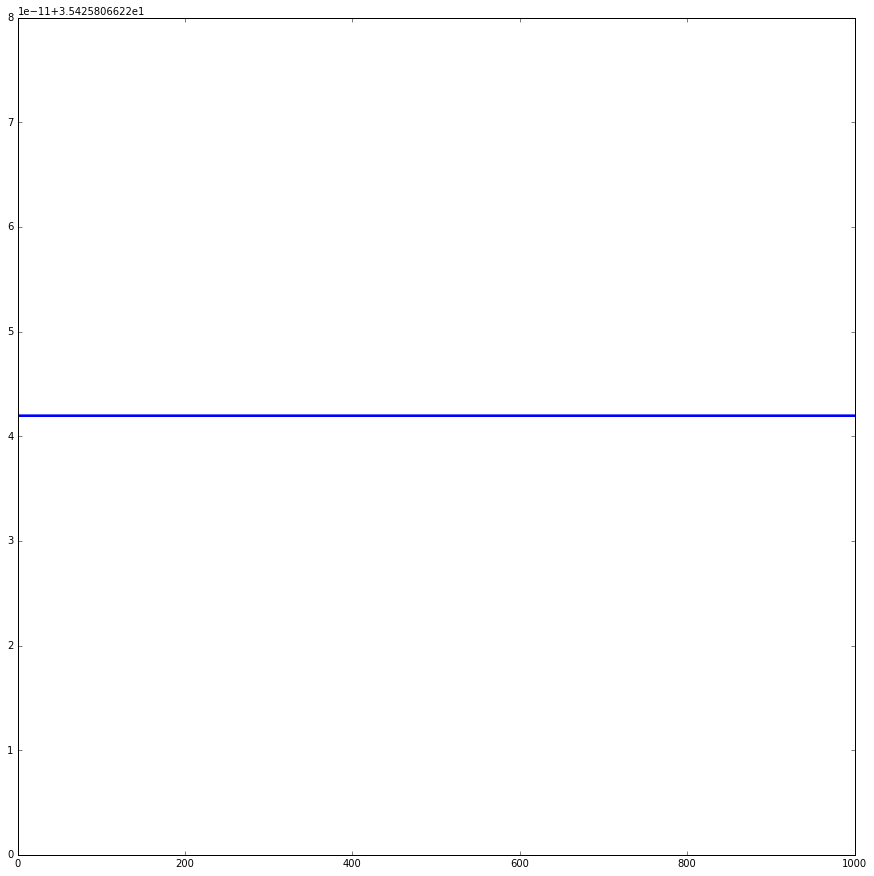

In [49]:
plt.plot(TIME, [U_sin(t, w0, R_ON, R_OFF, D, mu, U0) for t in TIME])
plt.show()